### Step 1 : Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import umap.umap_ as umap
from mpl_toolkits.mplot3d import Axes3D


C:\Users\ys723\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading the csv file
df = pd.read_csv('data.csv')

C:\Users\ys723\AppData\Local\Temp\ipykernel_13368\1334155453.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


## Exploratory data analysis

In [3]:
# Checking shape
df.shape

(42305, 22)

In [4]:
# Checking first 5 rows of the dataframe
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [5]:
# Let's check the datatype of all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

## Data cleaning

In [6]:
# Removing unnecessary columns from the dataframe
df.drop(['id', 'uri', 'track_href', 'analysis_url','Unnamed: 0', 'title','time_signature','type','song_name'],axis=1,inplace=True)

In [7]:
# Checking any null values and duplicated value
print(df.isnull().mean()*100)
print('Number of duplicate values',df.duplicated().sum())

danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
genre               0.0
dtype: float64
Number of duplicate values 4180


In [8]:
# Let's drop the duplicated values
print("Duplicate data points",df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate data points 4180


In [9]:
# Let's check if there are any outliers
num_cols = df.select_dtypes(exclude='object')
num_cols.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

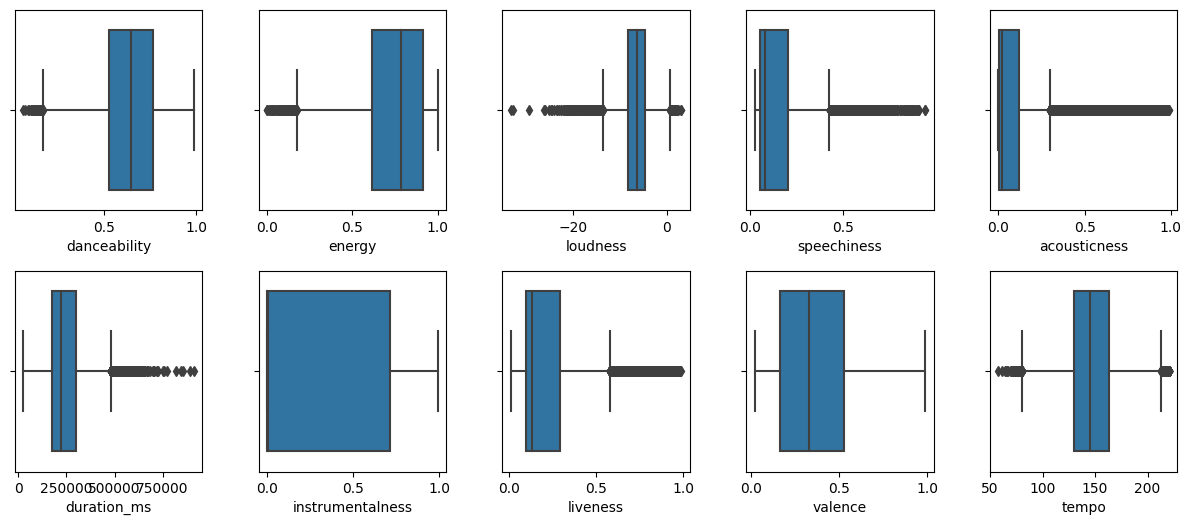

In [10]:
# Plotting boxplot to visualize if there are any outliers
fig,ax = plt.subplots(2,5,figsize = (15,6))

sns.boxplot(x = df['danceability'],ax = ax[0][0])
sns.boxplot(x = df['energy'],ax = ax[0][1])
sns.boxplot(x = df['loudness'],ax = ax[0][2])
sns.boxplot(x = df['speechiness'],ax = ax[0][3])
sns.boxplot(x = df['acousticness'],ax = ax[0][4])

sns.boxplot(x = df['duration_ms'],ax = ax[1][0])
sns.boxplot(x = df['instrumentalness'],ax = ax[1][1])
sns.boxplot(x = df['liveness'],ax = ax[1][2])
sns.boxplot(x = df['valence'],ax = ax[1][3])
sns.boxplot(x = df['tempo'],ax = ax[1][4])

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

Out of all the numerical features only valence is the feature which is not having any outliers

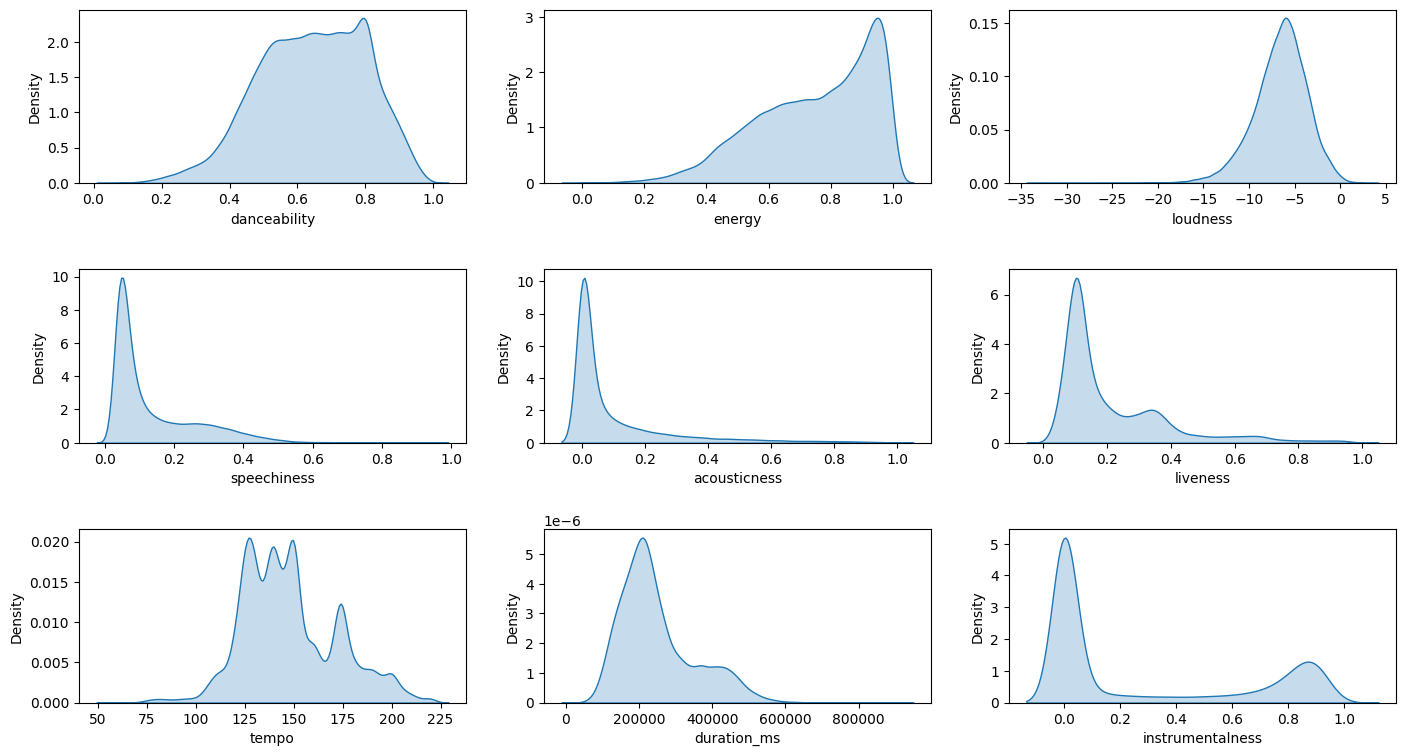

In [11]:
# Let's check the shape of distribution
fig,ax = plt.subplots(3,3,figsize = (17,9))

sns.kdeplot(x = df['danceability'],ax = ax[0][0],fill=True)
sns.kdeplot(x = df['energy'],ax = ax[0][1],fill=True)
sns.kdeplot(x = df['loudness'],ax = ax[0][2],fill=True)

sns.kdeplot(x = df['speechiness'],ax = ax[1][0],fill=True)
sns.kdeplot(x = df['acousticness'],ax = ax[1][1],fill=True)
sns.kdeplot(x = df['liveness'],ax = ax[1][2],fill=True)

sns.kdeplot(x = df['tempo'],ax = ax[2][0],fill=True)
sns.kdeplot(x = df['duration_ms'],ax = ax[2][1],fill=True)
sns.kdeplot(x = df['instrumentalness'],ax = ax[2][2],fill=True)

plt.subplots_adjust(hspace=0.5,wspace=0.2)
plt.show()

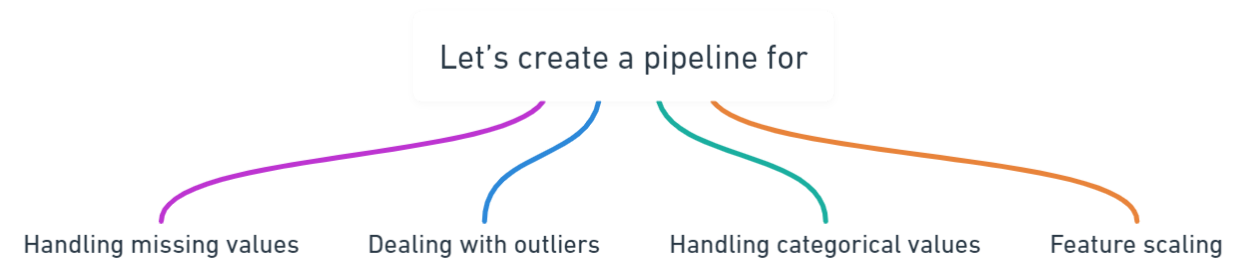

To deal with outliers we can either remove them or we can cap them. So to decide what to do with outliers let's first find the total percentage of outliers present in each feature and on the basis of that we will decide our method to deal with outliers.

In [12]:
# Handling with outliers
def find_limits(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3 - q1
    Upper_lmt = q3 + 1.5 * IQR
    Lower_lmt = q1 - 1.5 * IQR
    return [Upper_lmt,Lower_lmt]

# Empty list to store outliers percentage
outliers_per = []
for cols in df.columns[:-1]:
    lmts = find_limits(df[cols])
    values = df[cols][(df[cols]>lmts[0])|(df[cols]<lmts[1])]
    outliers_per.append((len(values)/len(df[cols]))*100)

In [13]:
outliers_df = pd.DataFrame(outliers_per)
outliers_df.columns = ['Percentage']
outliers_df['features'] = df.columns[:-1]
outliers_df

,Percentage,features
0,0.131148,danceability
1,0.288525,energy
2,0.000000,key
3,1.969836,loudness
4,0.000000,mode
5,3.535738,speechiness
6,11.501639,acousticness
7,0.000000,instrumentalness
8,5.996066,liveness
9,0.000000,valence


In [14]:
# Let's mow encode the categorical values
df = pd.get_dummies(data=df, columns=['genre'], dtype=int)

In [15]:
# Let's do train test split
X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)

## Model training

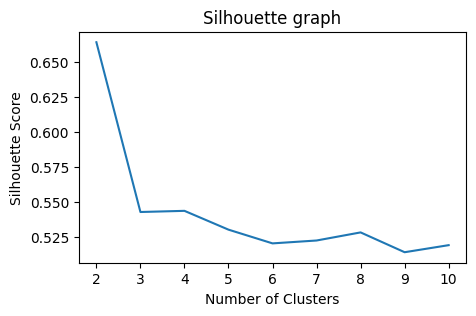

In [16]:
# Let's find out what would be the best value of K
sillhouete_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',n_init=10)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_test)
    silhouette_avg = silhouette_score(X_test, labels)
    sillhouete_scores.append(silhouette_avg)
    
    
# Visualize the graph between sillhuoette score and number of clusters
fig,ax = plt.subplots(figsize=(5,3))

plt.plot(range(2, 11), sillhouete_scores)
plt.title('Silhouette graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [18]:
# Let's create an object of KMeans class
kmeans = KMeans(n_clusters = 2,init='k-means++',n_init=10)

# Training the model
kmeans.fit(X_train)

KMeans(n_clusters=2, n_init=10)

In [19]:
# Create a PCA object and fit it to the data
pca = PCA(n_components=3)
pca.fit(X_train)

# Transform the data to two dimensions
X_train_pca = pca.transform(X_train)

reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(X_train_pca)

# Get the cluster labels
labels = kmeans.predict(X_train)

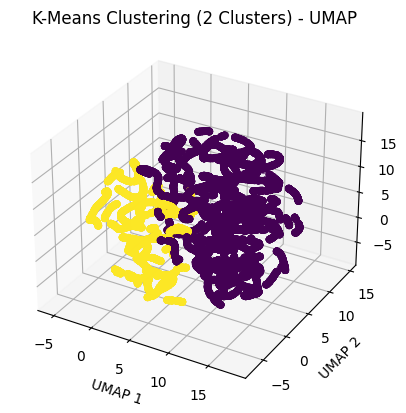

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels)
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
ax.set_title('K-Means Clustering (2 Clusters) - UMAP')
plt.show()

In [13]:
# Let's create a numerical and cateogrical transformer
num_transformer = ColumnTransformer(transformers = [('Nan_values',,)
                                                   ('Feature_Scale',,)],remainder='passthrough')
    
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])


categorical_transformer = ColumnTransformer(transformers = [], remainder='passthrough')

# let's create a pipeline
pipeline = Pipeline(steps = [('Numerical_transformer',),
                            ('Categorical_transformer',)])